In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime

# Je commence par importer toutes les librairies qui pourraient me servir dans mes analyses.

In [148]:
data=pd.read_csv("conso_edf.csv", encoding="utf-8")
data.tail()
# J'ai tout d'abord converti mon fichier EDF numbers en fichier csv avec virgule pour une bonne lecture des colonnes.

,Date de relevé de l'index,Type d'index,Index Heures creuses (kWh),Index Heures pleines (kWh),Conso_hc,Conso_hp
491,24/08/21,Index transmis par le distributeur,332,211,77,49
492,12/08/21,Index transmis par le distributeur,255,162,212,130
493,12/07/21,Index transmis par le distributeur,43,32,24,13
494,09/07/21,Index transmis par le distributeur,19,19,19,19
495,06/07/21,Index transmis par le distributeur,0,0,0,0


In [63]:
data.shape
# On peut constater qu'il y a 503 lignes et 4 colonnes.

(496, 6)

In [64]:
data["date_conso"]=data["Date de relevé de l'index"]
data["date_conso"]=pd.to_datetime(data["date_conso"])
data.info()
# 1)Le premier reflexe est de vérifier que toutes les variables sont importées dans le bon type.
# Dans le cas présent, on peut voir que Date de consommation est de type object et non pas de type date.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date de relevé de l'index   496 non-null    object        
 1   Type d'index                496 non-null    object        
 2   Index Heures creuses (kWh)  496 non-null    int64         
 3   Index Heures pleines (kWh)  496 non-null    int64         
 4   Conso_hc                    496 non-null    int64         
 5   Conso_hp                    496 non-null    int64         
 6   date_conso                  496 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 27.2+ KB


In [65]:
data.isnull().sum()
# 2)On remarque qu'il n'y a pas de valeurs manquantes.

Date de relevé de l'index     0
Type d'index                  0
Index Heures creuses (kWh)    0
Index Heures pleines (kWh)    0
Conso_hc                      0
Conso_hp                      0
date_conso                    0
dtype: int64

In [66]:
data.loc[data[["Date de relevé de l'index", "Type d'index", "Index Heures creuses (kWh)", "Index Heures pleines (kWh)", "Conso_hc", "Conso_hp"]].duplicated(keep=False),:]
# 3)On remarque qu"il y a deux lignes qui se repètent et de même date avec les mêmes données. On constate qu'il y a donc un doublon.

,Date de relevé de l'index,Type d'index,Index Heures creuses (kWh),Index Heures pleines (kWh),Conso_hc,Conso_hp,date_conso


In [67]:
data.drop_duplicates(subset=["Date de relevé de l'index", "Type d'index", "Index Heures creuses (kWh)", "Index Heures pleines (kWh)"], inplace=True, ignore_index=True)
# Dans le cas où l'on aurait vu un ou plusieurs doublons, nous aurions pu supprimer les lignes de cette manière.

In [68]:
data.loc[data[["Date de relevé de l'index", "Type d'index", "Index Heures creuses (kWh)", "Index Heures pleines (kWh)"]].duplicated(keep=False),:]
# Puis on aurait vérifié si l'opération a bien fonctionné.

,Date de relevé de l'index,Type d'index,Index Heures creuses (kWh),Index Heures pleines (kWh),Conso_hc,Conso_hp,date_conso


In [69]:
data.describe(include="all")
# 4) On peut remarquer plusieurs données incohérentes. Il y a donc des outliers. Notamment le max heures creuses.

/var/folders/3s/xg7vwwgn7jsfxf0m11v5gy7h0000gn/T/ipykernel_7394/1976001467.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include="all")


,Date de relevé de l'index,Type d'index,Index Heures creuses (kWh),Index Heures pleines (kWh),Conso_hc,Conso_hp,date_conso
count,496,496,496.000000,496.000000,496.000000,496.000000,496
unique,495,1,NaN,NaN,NaN,NaN,495
top,30/10/22,Index transmis par le distributeur,NaN,NaN,NaN,NaN,2022-10-30 00:00:00
freq,2,496,NaN,NaN,NaN,NaN,2
first,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-09 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-31 00:00:00
mean,NaN,NaN,2112.618952,1271.584677,7.651210,4.665323,NaN
std,NaN,NaN,1016.895433,621.699870,9.996227,6.207269,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,1223.500000,716.250000,6.000000,3.000000,NaN


In [70]:
data.loc[data['Conso_hc']==data['Conso_hc'].max()]


,Date de relevé de l'index,Type d'index,Index Heures creuses (kWh),Index Heures pleines (kWh),Conso_hc,Conso_hp,date_conso
492,12/08/21,Index transmis par le distributeur,255,162,212,130,2021-12-08


In [71]:
data.loc[data['Conso_hp']==data['Conso_hp'].max()]

,Date de relevé de l'index,Type d'index,Index Heures creuses (kWh),Index Heures pleines (kWh),Conso_hc,Conso_hp,date_conso
492,12/08/21,Index transmis par le distributeur,255,162,212,130,2021-12-08


In [72]:
# Retrouver l'index de l'outlier HC.

L'analyse univariée. Voici les 3 mesures de tendance centrale :

In [73]:
data["Conso_hc"].mode()
data["Conso_hp"].mode()

0    3
Name: Conso_hp, dtype: int64

In [74]:
Moy_HP=data["Conso_hp"].mean()
print(Moy_HP)
# Ici on a calculé la moyenne de consommation kWh durant les heures pleines.

Moy_HC=data["Conso_hc"].mean()
print(Moy_HC)
# Ici on a calculé la moyenne de consommation kWh durant les heures creuses.

4.665322580645161
7.651209677419355


In [75]:
Med_HP=data["Conso_hp"].median()
print(Med_HP)

Med_HC=data["Conso_hc"].median()
print(Med_HC)



4.0
7.0


Les mesures de dispersion :

In [28]:
data["Conso_hp"].var()
# Ici nous avons calculé la variance empirique sans biais sur l'index des heures pleines.

38.530188986640596

In [29]:
data["Conso_hp"].std()
# Ici nous avons calculé l'écart-type empirique qui est juste la racine carrée de la variance empirique.

6.207269044164317

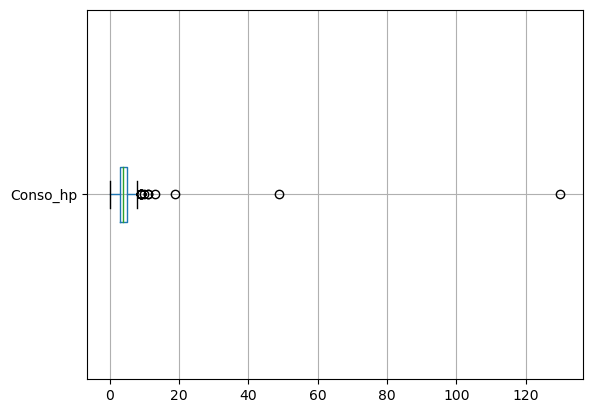

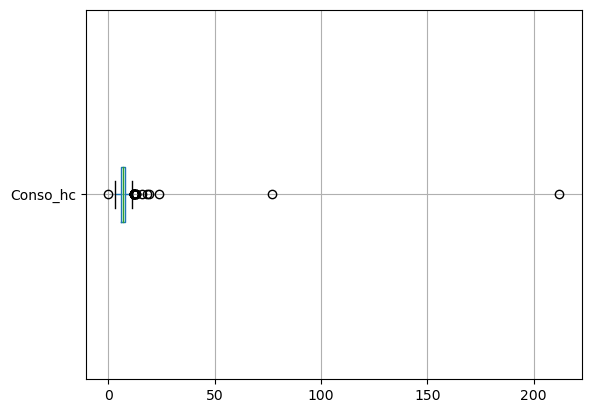

In [30]:
data.boxplot(column="Conso_hp", vert=False)
plt.show()

data.boxplot(column="Conso_hc", vert=False)
plt.show()

# Ici nous avons créer une boîte à moustaches permettant d'avoir une vue globale sur la consommation électrique.La ligne verte représente la médiane. Les deux traits noirs représentes les consos min & max et les ronds représentent des outliers. 

In [34]:
data.loc[(data['Conso_hc']>50)|(data['Conso_hp']>40)]

,Date de relevé de l'index,Type d'index,Index Heures creuses (kWh),Index Heures pleines (kWh),Conso_hc,Conso_hp,date_conso
491,24/08/21,Index transmis par le distributeur,332,211,77,49,2021-08-24
492,12/08/21,Index transmis par le distributeur,255,162,212,130,2021-12-08


In [ ]:
#Affichons les outliers visible sur les boxplots

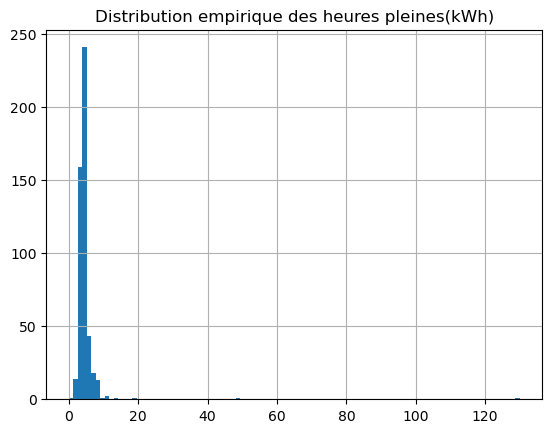

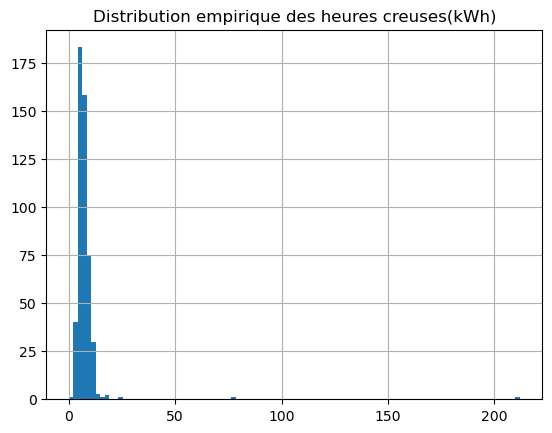

In [42]:
plt.title("Distribution empirique des heures pleines(kWh)")
data["Conso_hp"].hist(bins=100)
plt.show()

plt.title("Distribution empirique des heures creuses(kWh)")
data["Conso_hc"].hist(bins=100)
plt.show()
# Ici nous avons créer une distribution empirique de deux variables : histogramme heures pleines et heures creuses.

In [62]:
data['Conso_hp'].skew()
# j'ai du mal a comprendre ce que ça représente. ça devrait représenter la symétrie d'une distribution de données autour de sa moyenne.

17.472704884011495

In [63]:
data['Conso_hp'].kurtosis()
# j'ai du mal a comprendre ce que ça représente. ça devrait représenter l'aplatissement mais je comprend pas la logique.

342.27516507876896

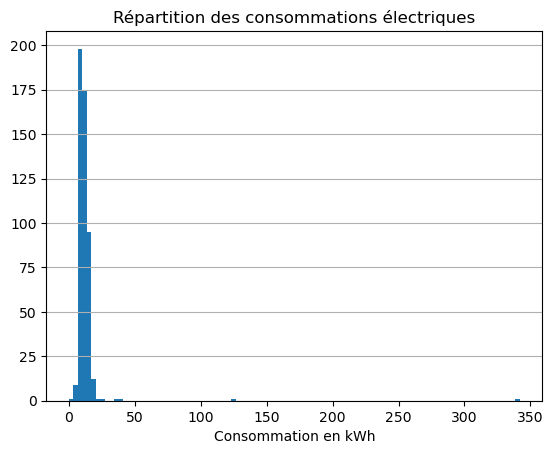

In [76]:
plt.title("Répartition des consommations électriques")
plt.xlabel("Consommation en kWh")
data["consommation_totale"]=data['Conso_hp']+data['Conso_hc']
plt.hist(data["consommation_totale"], bins=100)
plt.grid(axis="y")
plt.show()
#Cela nous donne un aperçu de la répartition des consommations.

In [152]:
data["date_conso"]=data["Date de relevé de l'index"]
data["date_conso"]=pd.to_datetime(data["date_conso"])

data.set_index("date_conso", inplace=True)





In [153]:
data[["Conso_hc", "Conso_hp"]]



,Conso_hc,Conso_hp
date_conso,,
2022-12-31,13,6
2022-12-30,7,5
2022-12-29,5,6
2022-12-28,7,5
2022-12-27,12,5
...,...,...
2021-08-24,77,49
2021-12-08,212,130
2021-12-07,24,13


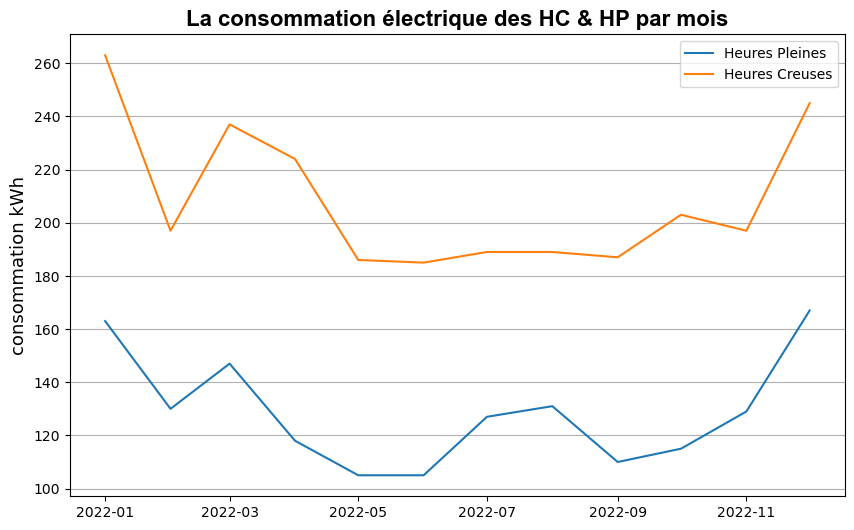

In [158]:
data["cons_m_hc"]=data["Conso_hc"].resample("MS").sum()
data["cons_m_hp"]=data["Conso_hp"].resample("MS").sum()


plt.figure(figsize=(10,6))
plt.plot(data.index, data["cons_m_hp"], label="Heures Pleines")
plt.plot(data.index, data["cons_m_hc"], label="Heures Creuses")
plt.legend(loc="upper right")
plt.ylabel("consommation kWh", fontsize=13)
plt.grid(axis="y")
plt.title("La consommation électrique des HC & HP par mois", fontsize=16, fontname="Arial",fontweight="bold")
plt.show()





In [149]:
data.dtypes

Date de relevé de l'index     object
Type d'index                  object
Index Heures creuses (kWh)     int64
Index Heures pleines (kWh)     int64
Conso_hc                       int64
Conso_hp                       int64
dtype: object

In [26]:
data.sort_index(inplace=True)
#Tri de l'index dans l'ordre croissant
print(data.tail())
# Permet de voir si il y a des valeurs manquantes. Nous voyons qu'il y en a en fin de tableau.

    Date de relevé de l'index                        Type d'index  \
493                  24/08/21  Index transmis par le distributeur   
494                  12/08/21  Index transmis par le distributeur   
495                  12/07/21  Index transmis par le distributeur   
496                  09/07/21  Index transmis par le distributeur   
497                  06/07/21  Index transmis par le distributeur   

     Index Heures creuses (kWh)  Index Heures pleines (kWh)  Conso_hc  \
493                         332                         211        77   
494                         255                         162       212   
495                          43                          32        24   
496                          19                          19        19   
497                           0                           0         0   

     Conso_hp  consommation_totale  
493        49                  126  
494       130                  342  
495        13                   37 

In [27]:
data.dropna(inplace=True)
#Cette fonction m'a permis de supprimer les lignes ou les valeurs étaient inscrite "NaN". 
#Suite à cela, j'ai pu reéxécuter mon plot et j'ai pu voir les courbes HP et HC au dessus.


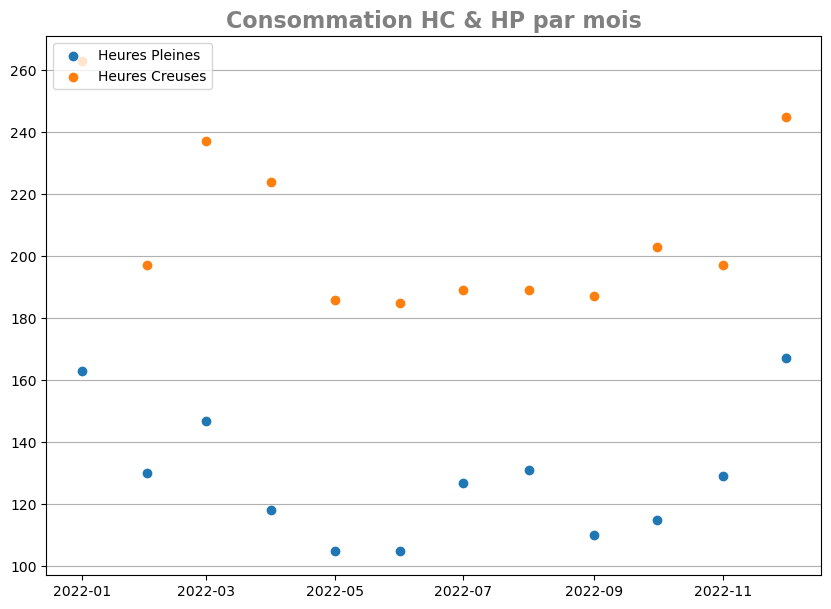

In [160]:
#Essayons de reproduire cela mais sous forme de nuages de points.
plt.figure(figsize=(10,7))
plt.scatter(data.index,data["cons_m_hp"], label="Heures Pleines")
plt.scatter(data.index,data["cons_m_hc"], label="Heures Creuses")
plt.legend(loc="upper left")
plt.title("Consommation HC & HP par mois", fontweight="bold", fontsize=16, c="grey")
plt.grid(axis="y")
plt.show()



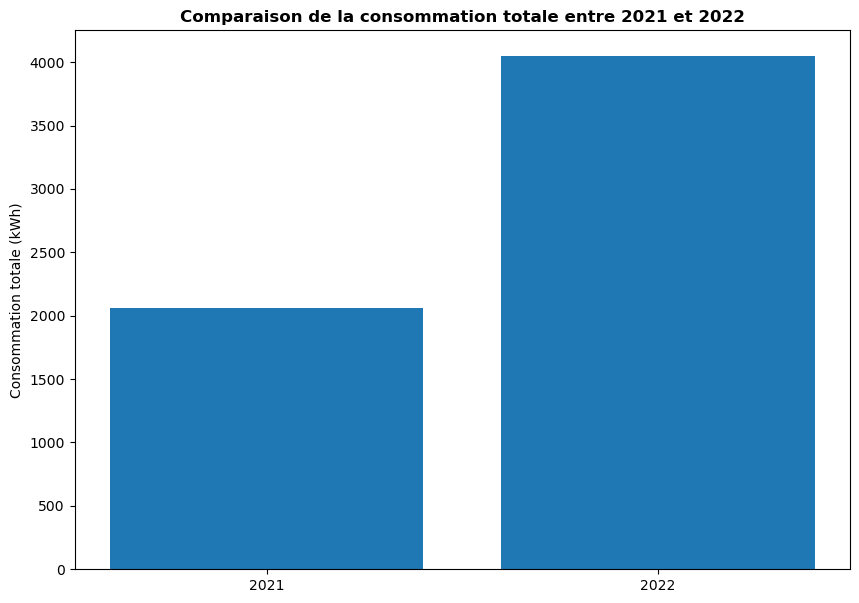

In [161]:
# Sélectionnez les données pour l'année 2021
data_2021 = data.loc[data.index.year == 2021]

# Sélectionnez les données pour l'année 2022
data_2022 = data.loc[data.index.year == 2022]

# Calculer la consommation totale pour chaque année
cons_2021 = data["Conso_hp"].resample("Y").sum() + data_2021["Conso_hc"].sum()
cons_2022 = data_2022["Conso_hp"].sum() + data_2022["Conso_hc"].sum()

# Créez un barplot qui compare les deux années
plt.figure(figsize=(10,7))
plt.bar(["2021", "2022"], [cons_2021, cons_2022])
plt.ylabel("Consommation totale (kWh)")
plt.title("Comparaison de la consommation totale entre 2021 et 2022", fontweight="bold")
plt.show()

#On peut remarquer que la consommation n'a cessé d'augmenter en 2022 malgrès "la sobriété demandée par l'état". 